In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams["font.family"] = "DejaVu Sans"

#load summarize dataset
try:
    summ_data = load_dataset('csv', data_files="../data/raw/news.csv")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

#load sentiment dataset
try:
    sent_data = load_dataset('csv', data_files="../data/raw/data - data.csv")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")



Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['URL', 'Title', 'Summary', 'Contents', 'Date', 'Author(s)', 'Category', 'Tags'],
        num_rows: 313320
    })
})

Sample Content: Kết quả đoàn kiểm tra của Sở Y tế TPHCM từ ngày 9 đến 13.10, có 16 cơ sở  bị phạt hành chính với nhiều sai phạm khác nhau như về giá, khám chữa bệnh không phép.  Cụ thể, Công ty TNHH Phòng khám Đa khoa Lians MMC (lầu 2 số 35 đường Nội khu Hưng Phước 4 phường Tân Phong quận 7) bị phạt 59,4 triệu đồng ...
Sample Summary: Sở Y tế TPHCM vừa tiến hành kiểm tra 16 cơ sở khám chữa bệnh, nhà thuốc tư nhân trên địa bàn TPHCM và xử phạt hành chính theo quy định. Trong đó, một số phòng khám có yếu tố nước ngoài bị phạt nặng.

Length stats (words):
       contents_len   summary_len
count  43909.000000  43909.000000
mean     504.773509     41.905509
std      373.844960     16.579500
min        3.000000      3.000000
25%      303.000000     30.000000
50%      445.000000     39.000000
75%      619.000000     50.00000

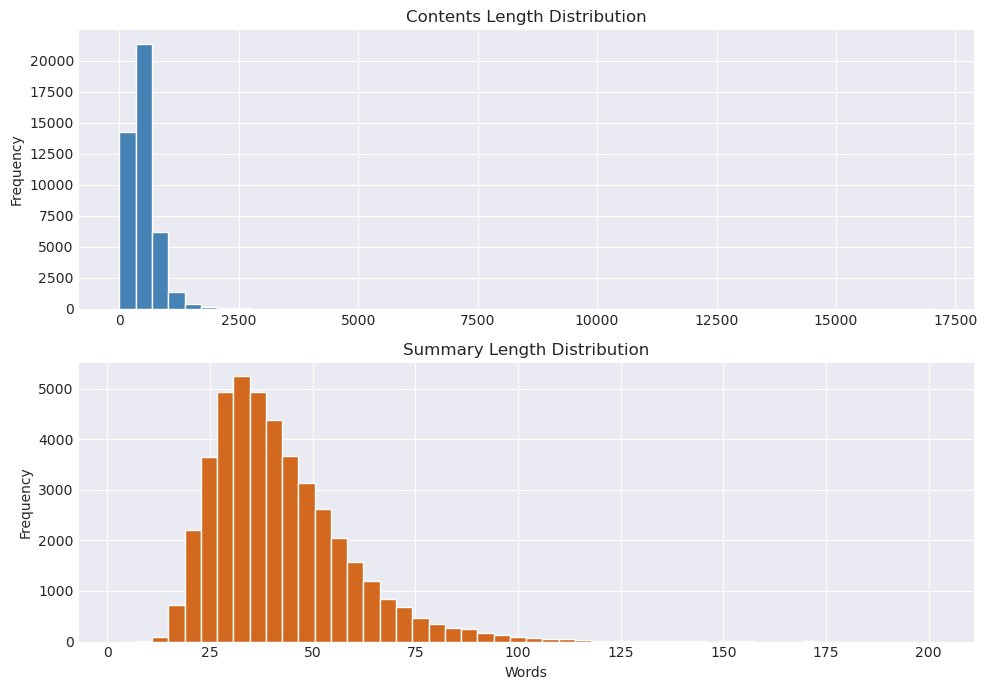

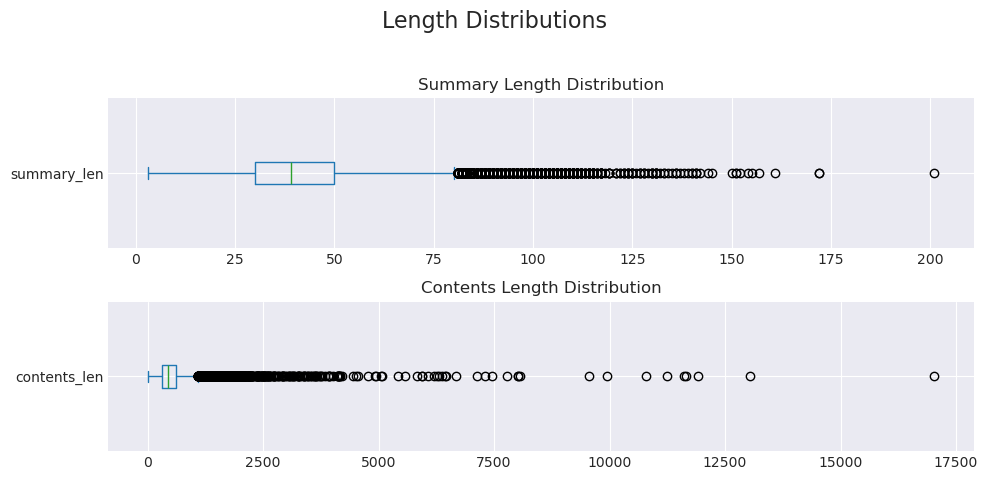

In [2]:
# inspect summarization dataset
if summ_data:
    print(summ_data)

    # take 1/7 of the datasets for faster EDA + fine tune with laptop gpu
    train_ds = summ_data["train"].shuffle(seed=42)
    sample_size = len(train_ds) // 7
    train_sample = train_ds.select(range(sample_size))

    # convert to df and remove na
    df_summ = pd.DataFrame(train_sample)
    df_summ = df_summ.dropna(subset=["Contents", "Summary"])

    sample = df_summ.iloc[0]
    print("\nSample Content:", sample["Contents"][:300], "...")
    print("Sample Summary:", sample["Summary"])

    #compute length
    df_summ["contents_len"] = df_summ["Contents"].astype(str).apply(lambda x: len(x.split()))
    df_summ["summary_len"] = df_summ["Summary"].astype(str).apply(lambda x: len(x.split()))

    print("\nLength stats (words):")
    print(df_summ[["contents_len", "summary_len"]].describe())

    # Histo
    # sharex=False allows each plot to have its own x-axis range
    fig, ax = plt.subplots(2, 1, figsize=(10, 7), sharex=False)
    # Plot 'Contents' histogram on the first subplot
    ax[0].hist(df_summ["contents_len"], bins=50, color='steelblue', label="Contents")
    ax[0].set_title("Contents Length Distribution")
    ax[0].set_ylabel("Frequency")
    # Plot 'Summaries' histogram on the second subplot
    ax[1].hist(df_summ["summary_len"], bins=50, color='chocolate', label="Summaries")
    ax[1].set_title("Summary Length Distribution")
    ax[1].set_xlabel("Words")
    ax[1].set_ylabel("Frequency")
    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Create a figure and a set of subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(10, 5))
    # Plot 'summary_len' on the first subplot (ax[0])
    df_summ[["summary_len"]].plot(kind="box", vert=False, ax=ax[0])
    ax[0].set_title("Summary Length Distribution")
    # Plot 'contents_len' on the second subplot (ax[1])
    df_summ[["contents_len"]].plot(kind="box", vert=False, ax=ax[1])
    ax[1].set_title("Contents Length Distribution")
    # Add an overall title for the figure
    fig.suptitle("Length Distributions", fontsize=16)
    # Adjust layout to prevent titles/labels from overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


💬 Sentiment Dataset
DatasetDict({
    train: Dataset({
        features: ['comment', 'label', 'rate', 'Unnamed: 3'],
        num_rows: 31460
    })
})

Sample Text: Vai và tay áo vào lệch nên bị vặn.
Label: NEU


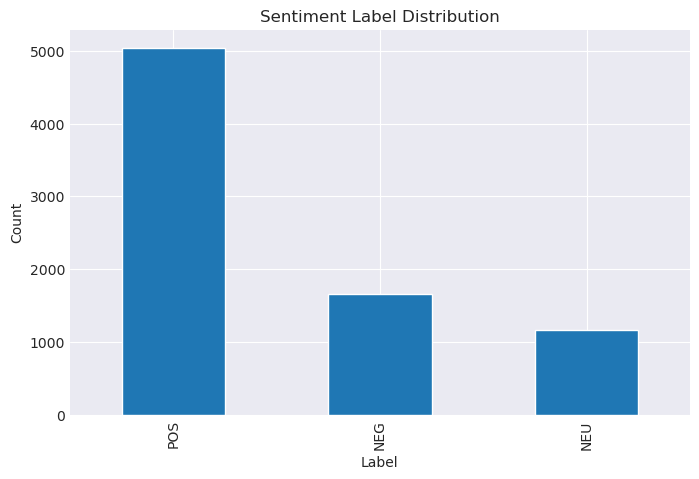

In [3]:
#Inspect sentiment dataset
if sent_data:
    print("\n💬 Sentiment Dataset")
    print(sent_data)

    #same as above but take 1/4 of the sentiment one
    train_ds = sent_data["train"].shuffle(seed=42)
    sample_size = len(train_ds) // 4
    train_sample = train_ds.select(range(sample_size))

    # convert to df and remove na
    df_sent = pd.DataFrame(train_sample)
    df_sent = df_sent.dropna(subset=["comment", "label"])

    # Show sample
    sample = df_sent.iloc[0]
    print("\nSample Text:", sample["comment"])
    print("Label:", sample["label"])

    #Label distribution
    df_sent["label"].value_counts().plot(kind="bar")
    plt.title("Sentiment Label Distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()